/tmp/ipykernel_14667/4157931331.py:87: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical',shrink=0.75)


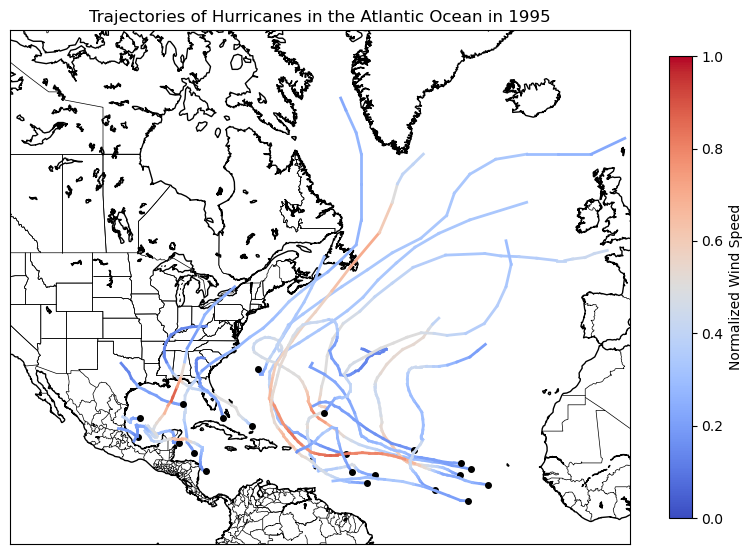

In [5]:
# columns are ["Date", "Time(UTC)", "Identifier", "Status", "Latitude", "Longitude", "MaxWind"]
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import csv
import numpy as np

# Read data from CSV file
csv_file = "hurdat2-A.csv" 
#csv_file = "hurdat2-P.csv" 
data = []

with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        data.append(row)

# Initialize a dictionary to store hurricane data for each storm
storms_data = {}

# Iterate over each line in the data
for row in data:
    # Check if the row starts with "AL" and it's from 1995
    if row[0].startswith("AL"):
        # Extract storm name and create a new entry in the storms_data dictionary
        storm_name = row[0]
        storms_data[storm_name] = {
            'dates': [],
            'times': [],
            'latitudes': [],
            'longitudes': [],
            'maxwind': []
        }
    else:
        if row[0].startswith("1995"):
            # Treat the row as hurricane data
            # Extracting date, time, and position\
            date = row[0]
            time = row[1]
            lat_str, lon_str = row[4], row[5]
            latitude = float(lat_str[:-1]) if lat_str[-1] in ['N', 'S'] else None
            longitude = float(lon_str[:-1]) if lon_str[-1] in ['E', 'W'] else None
            if lat_str[-1] == 'S':
                latitude *= -1
            if lon_str[-1] == 'W':
                longitude *= -1
            maxwind = int(row[6])  # maximum sustained wind speed in knots
            # Add data to respective lists for the current storm
            storms_data[storm_name]['dates'].append(date)
            storms_data[storm_name]['times'].append(time)
            storms_data[storm_name]['latitudes'].append(latitude)
            storms_data[storm_name]['longitudes'].append(longitude)
            storms_data[storm_name]['maxwind'].append(maxwind)

# Plot the trajectories of each storm on a map
plt.figure(figsize=(10, 8))

# Create a Basemap instance for the Atlantic Ocean region
m = Basemap(projection='merc', llcrnrlat=0, urcrnrlat=70, llcrnrlon=-120, urcrnrlon=0, resolution='l')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Create a colormap for wind speeds
cmap = plt.get_cmap('coolwarm')  # You can change the colormap as needed

# Plot each storm's trajectory
for storm_name, storm_data in storms_data.items():
    if not storm_data['latitudes'] or not storm_data['longitudes']:  # Skip empty lists
        continue
    # Normalize wind speeds to range [0, 1]
    normalized_speeds = np.array(storm_data['maxwind']) / 150
    # Plot storm trajectory with colors indicating wind speed
    for i in range(len(storm_data['dates']) - 1):
        x1, y1 = m(storm_data['longitudes'][i], storm_data['latitudes'][i])
        x2, y2 = m(storm_data['longitudes'][i+1], storm_data['latitudes'][i+1])
        plt.plot([x1, x2], [y1, y2], color=cmap(normalized_speeds[i]), linewidth=2)
    # Plot a dot at the origin point
    x_origin, y_origin = m(storm_data['longitudes'][0], storm_data['latitudes'][0])
    plt.plot(x_origin, y_origin, marker='o', color='k', markersize=4)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical',shrink=0.75)
cbar.set_label('Normalized Wind Speed')

# Add title and show plot
plt.title('Trajectories of Hurricanes in the Atlantic Ocean in 1995')
plt.show()